# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Checking the nulls and its percentage

In [6]:
 df.isnull().sum().sort_values(ascending = False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [7]:
(df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
                 ...    
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64

In [8]:
#removing the columns which are having more than 40% of null values
df.drop(['Alley','Fence','MiscFeature','PoolQC','FireplaceQu'] , axis = 1 , inplace = True)


In [9]:
(df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False).head(20)

LotFrontage     17.739726
GarageType       5.547945
GarageCond       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
PavedDrive       0.000000
WoodDeckSF       0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
dtype: float64

In [10]:
df[['GarageYrBlt','LotFrontage','MasVnrArea']].describe()

,GarageYrBlt,LotFrontage,MasVnrArea
count,1379.000000,1201.000000,1452.000000
mean,1978.506164,70.049958,103.685262
std,24.689725,24.284752,181.066207
min,1900.000000,21.000000,0.000000
25%,1961.000000,59.000000,0.000000
50%,1980.000000,69.000000,0.000000
75%,2002.000000,80.000000,166.000000
max,2010.000000,313.000000,1600.000000


In [11]:
 #imputing missing values with mean and median
    
    
df['LotFrontage']= df.LotFrontage.fillna(df.LotFrontage.median()) 
df['GarageYrBlt']= df.GarageYrBlt.fillna(df.GarageYrBlt.mean())  
df['MasVnrArea']= df.MasVnrArea.fillna(df.MasVnrArea.median())    


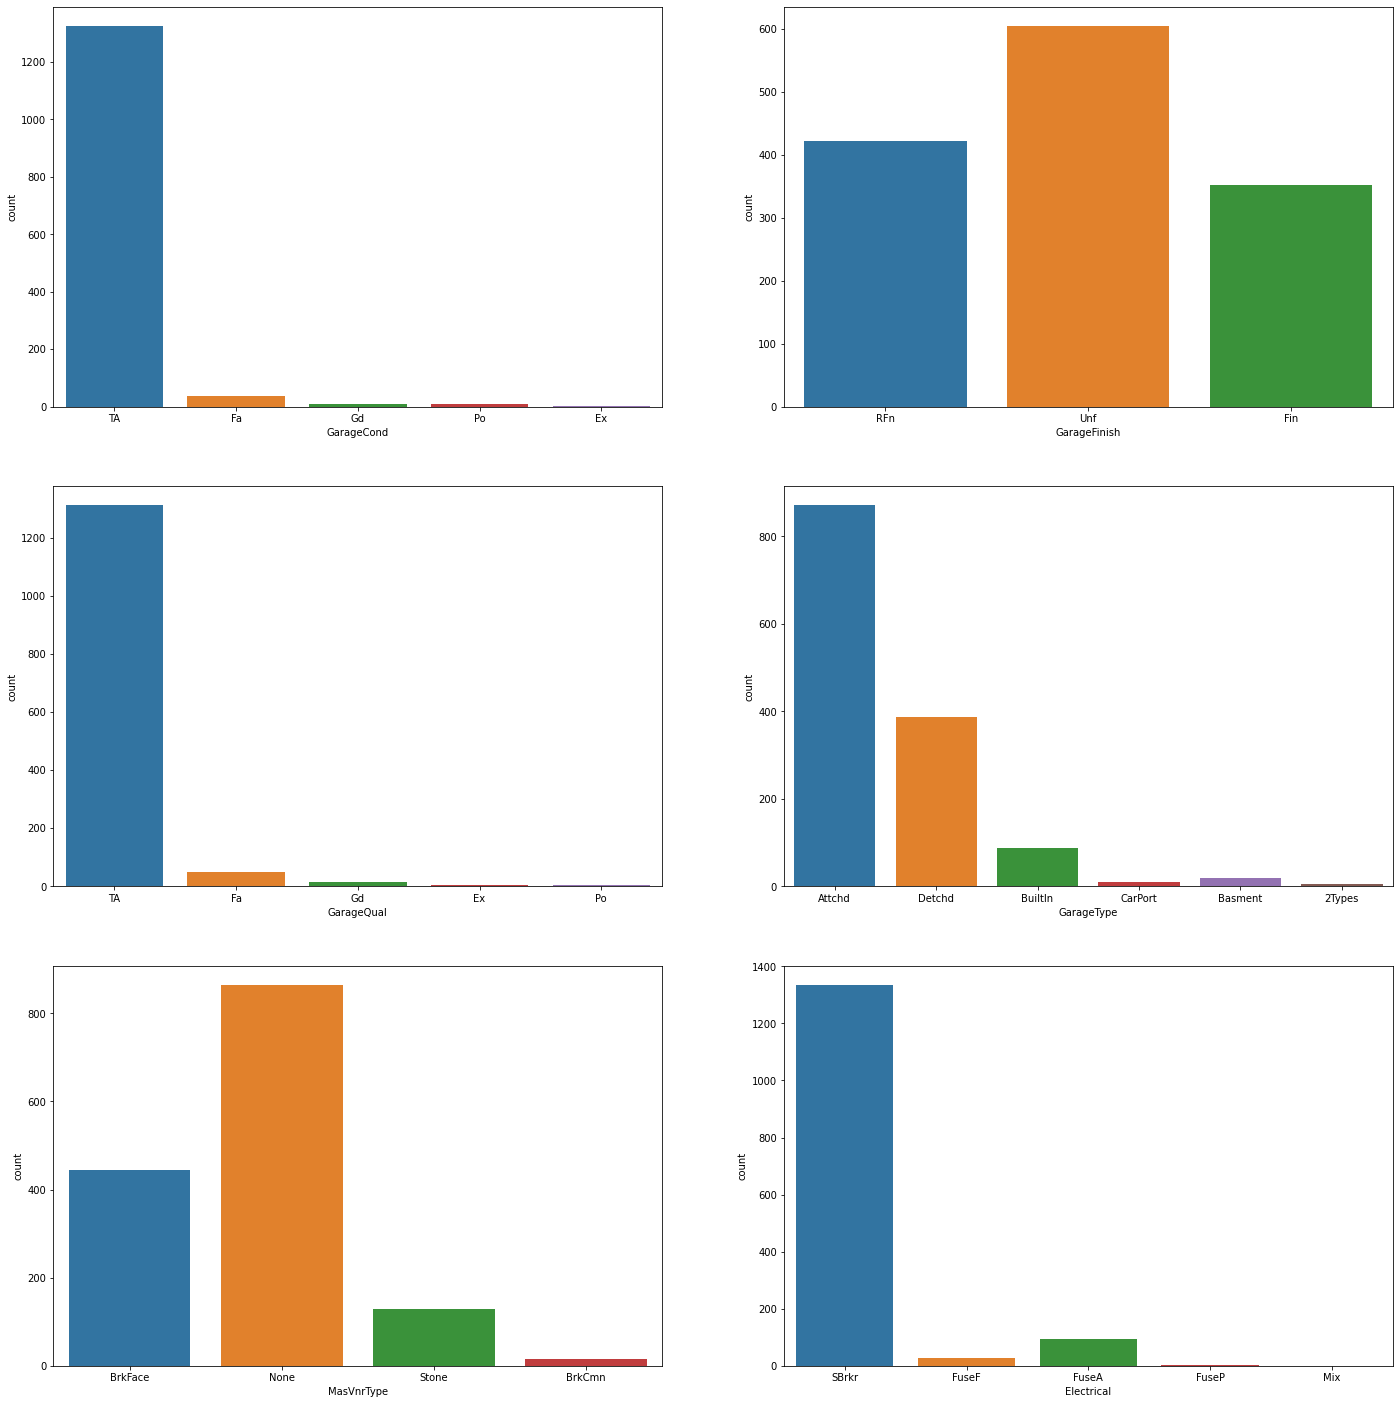

In [12]:
#Visualising the variables wih missing values using a countplot

plt.figure(figsize=(24, 25))
plt.subplot(3,2,1)
sns.countplot(x = 'GarageCond', data = df)
plt.subplot(3,2,2)
sns.countplot(x = 'GarageFinish',  data = df)
plt.subplot(3,2,3)
sns.countplot(x = 'GarageQual', data = df)
plt.subplot(3,2,4)
sns.countplot(x = 'GarageType', data = df)
plt.subplot(3,2,5)
sns.countplot(x = 'MasVnrType',  data = df)
plt.subplot(3,2,6)
sns.countplot(x = 'Electrical',  data = df)
plt.show()

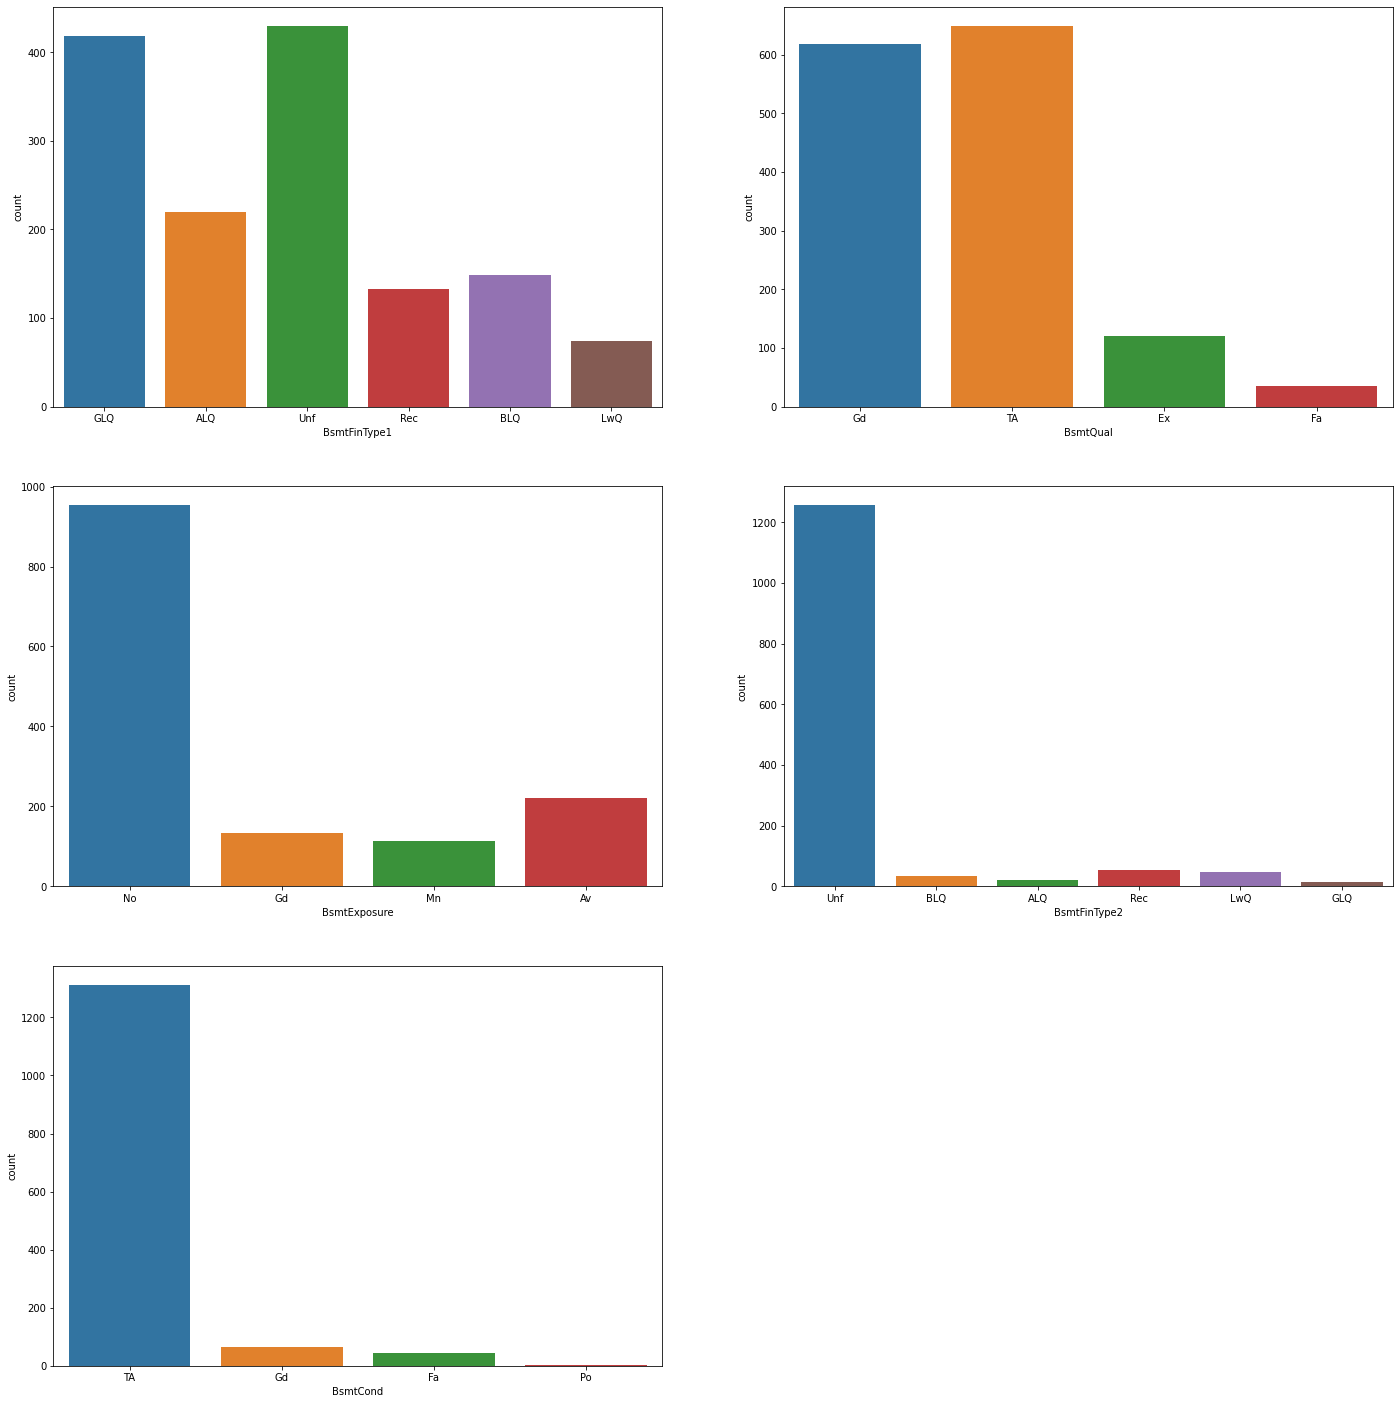

In [13]:

plt.figure(figsize=(24, 25))
plt.subplot(3,2,1)
sns.countplot(x = 'BsmtFinType1', data = df)
plt.subplot(3,2,2)
sns.countplot(x = 'BsmtQual', data = df)
plt.subplot(3,2,3)
sns.countplot(x = 'BsmtExposure', data = df)
plt.subplot(3,2,4)
sns.countplot(x = 'BsmtFinType2',  data = df)
plt.subplot(3,2,5)
sns.countplot(x = 'BsmtCond',  data = df)
plt.show()

In [14]:
# when there is no garage we are changing the value to No

df['GarageType'] = df['GarageType'].replace(np.nan, 'No')
df['GarageFinish'] = df['GarageFinish'].replace(np.nan, 'No')
df['MasVnrType'] = df['MasVnrType'].replace(np.nan, 'None') 
df['Electrical'] = df['Electrical'].replace(np.nan, 'SBrkr') 
df['GarageCond'] = df['GarageCond'].replace(np.nan, 'No')
df['GarageQual'] = df['GarageQual'].replace(np.nan, 'No')


In [15]:
# imputing the missing values
df['BsmtExposure'] = df['BsmtExposure'].replace(np.nan, 'No')
df['BsmtFinType2'] = df['BsmtFinType2'].replace(np.nan, 'No')
df['BsmtFinType1'] = df['BsmtFinType1'].replace(np.nan, 'No')
df['BsmtQual'] = df['BsmtQual'].replace(np.nan, 'No')
df['BsmtCond'] = df['BsmtCond'].replace(np.nan, 'No') 

In [16]:
df.isnull().sum().sort_values(ascending = False)

Id              0
FullBath        0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
               ..
MasVnrType      0
Exterior2nd     0
Exterior1st     0
RoofMatl        0
SalePrice       0
Length: 76, dtype: int64

In [17]:
df['OverallQual']=df['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

df['OverallCond']=df['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

df['MSSubClass']=df['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})




<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

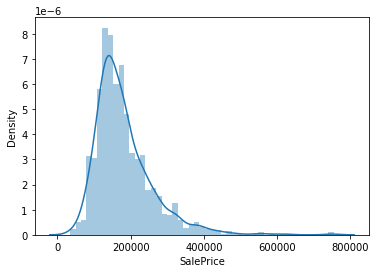

In [18]:
sns.distplot(df.SalePrice)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

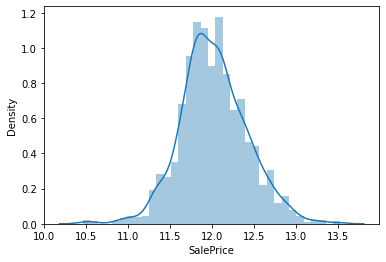

In [19]:
sns.distplot(np.log(df.SalePrice))

In [20]:
df['SalePrice'] = np.log(df.SalePrice) # converting to log 

<AxesSubplot:>

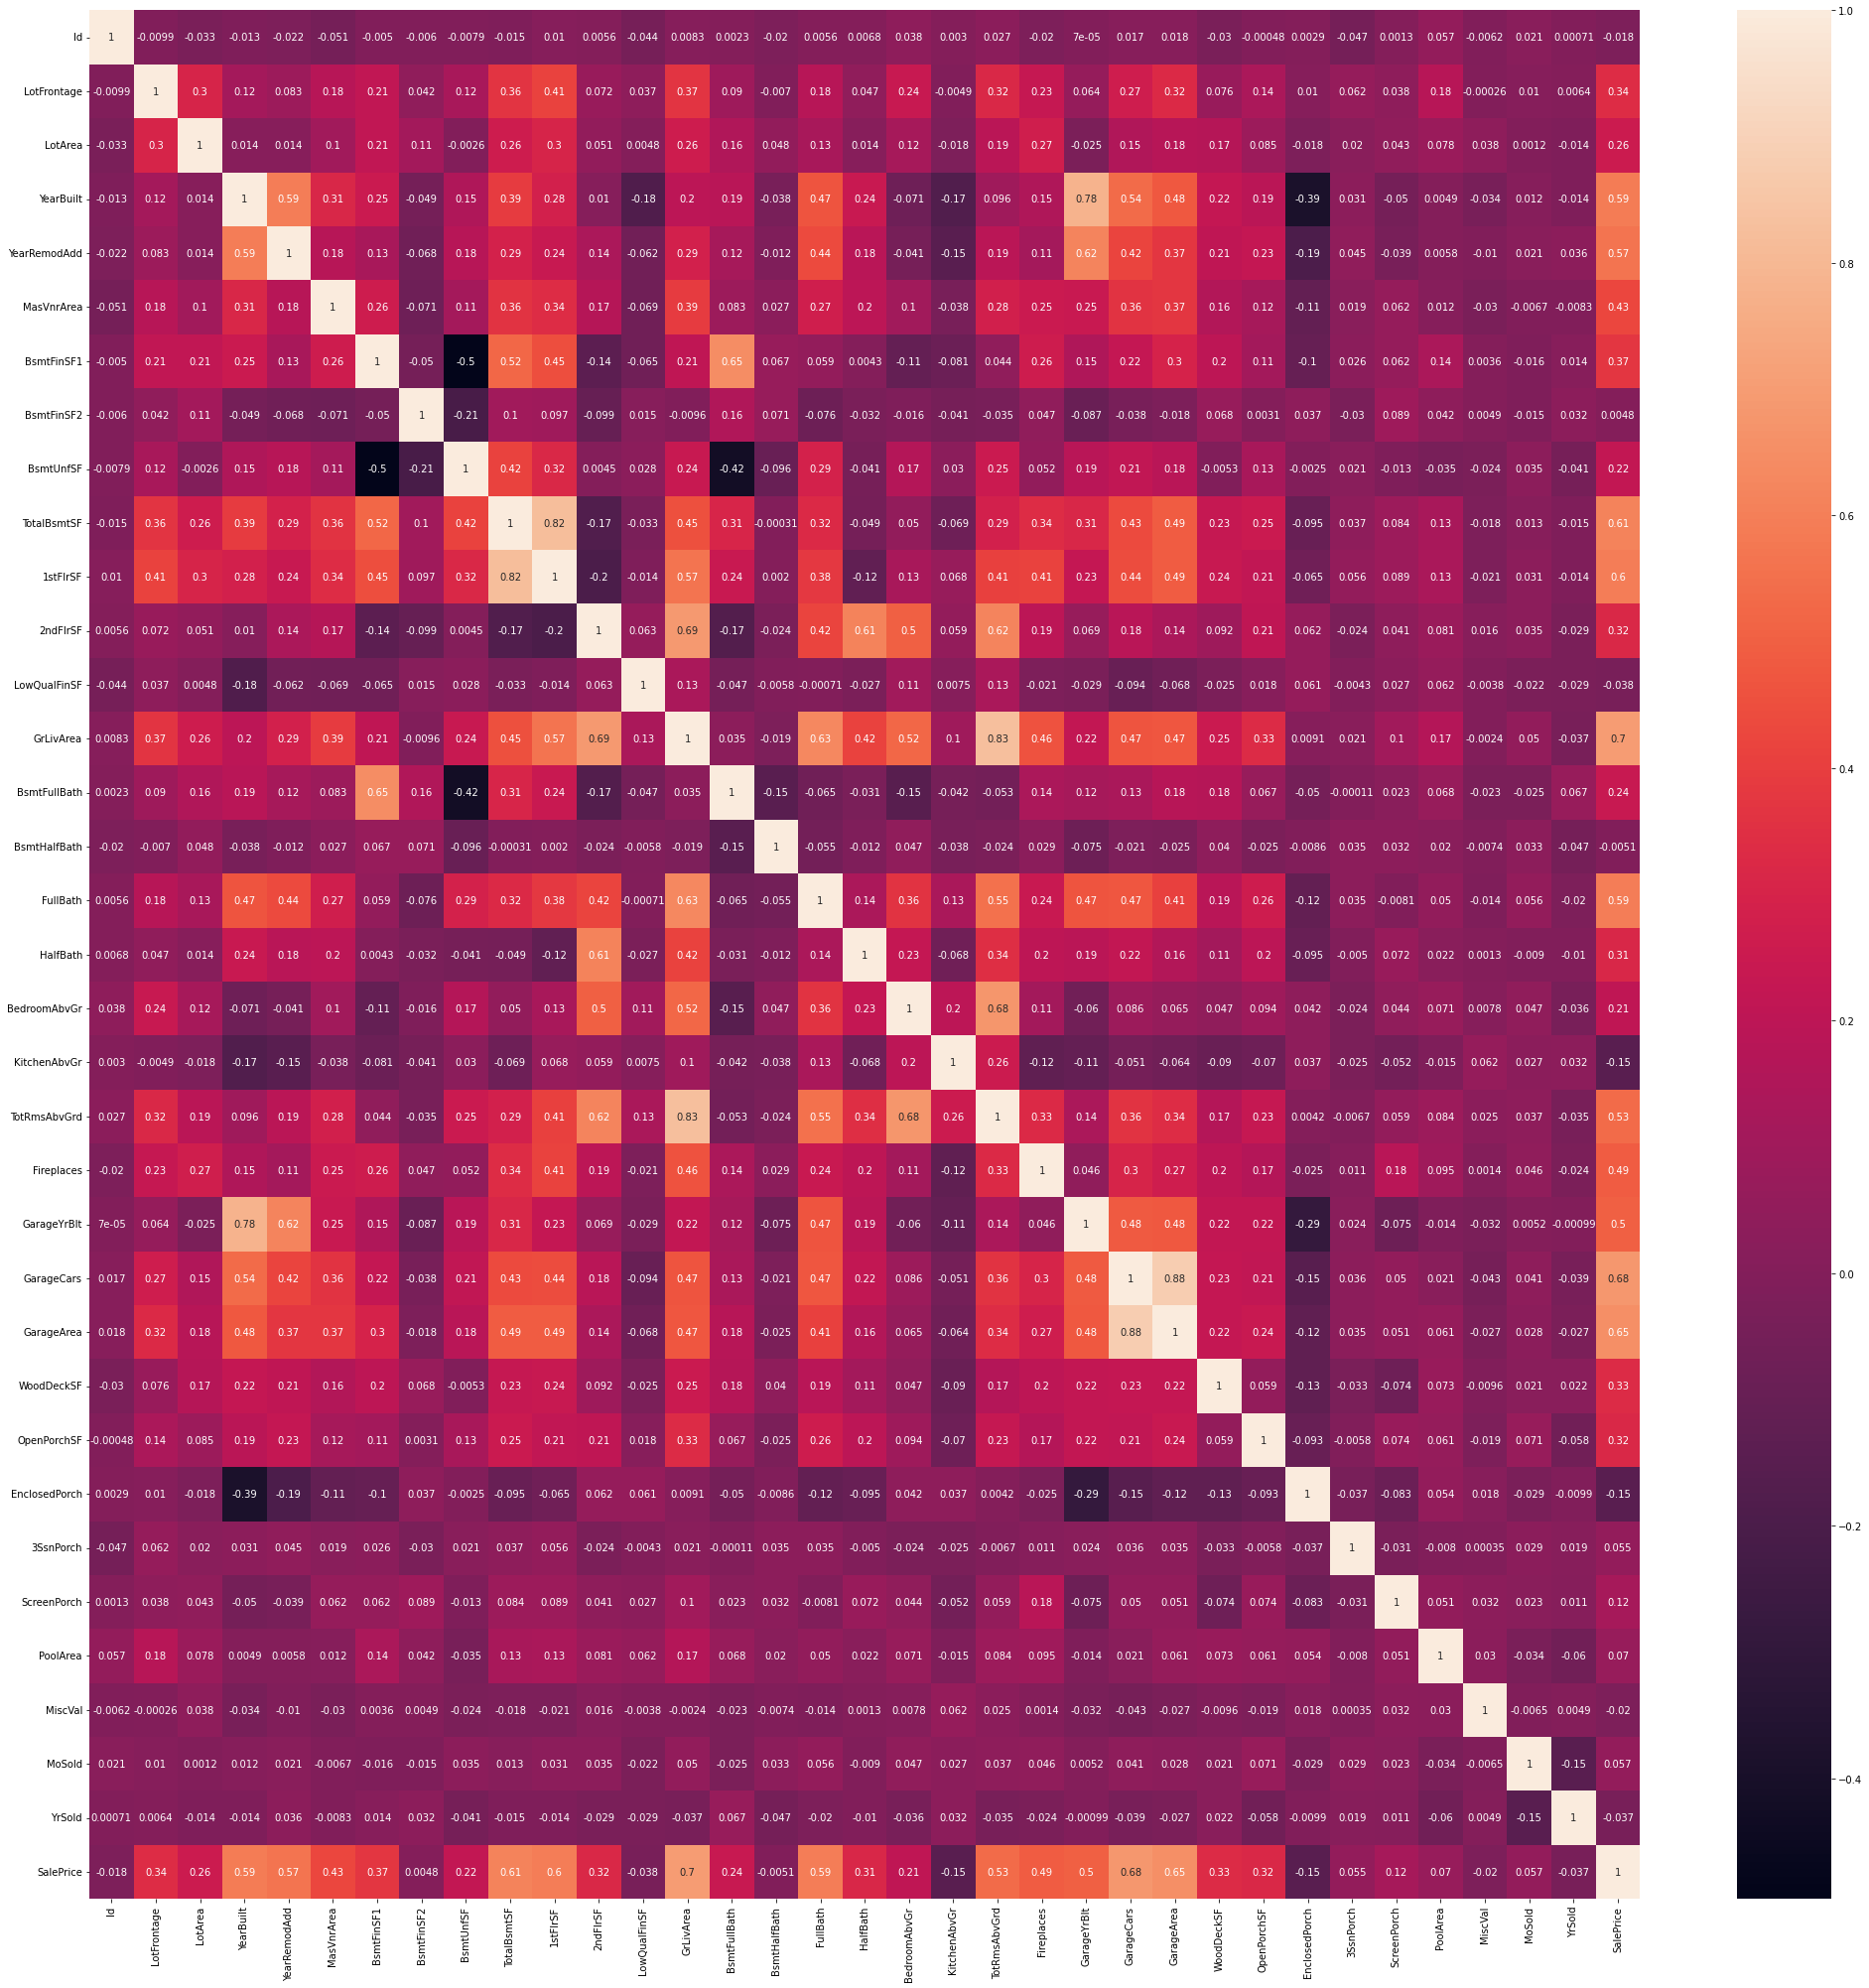

In [21]:
# correlation heat map

plt.figure(figsize=(35, 35))
sns.heatmap(df.corr(), annot = True)

In [22]:
num_val_corr = df[list(df.dtypes[df.dtypes != 'object'].index)].corr()

In [23]:
 num_val_corr[num_val_corr['SalePrice'] > 0.5]['SalePrice'].sort_values(ascending=False)


SalePrice       1.000000
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
TotRmsAbvGrd    0.534422
GarageYrBlt     0.500449
Name: SalePrice, dtype: float64

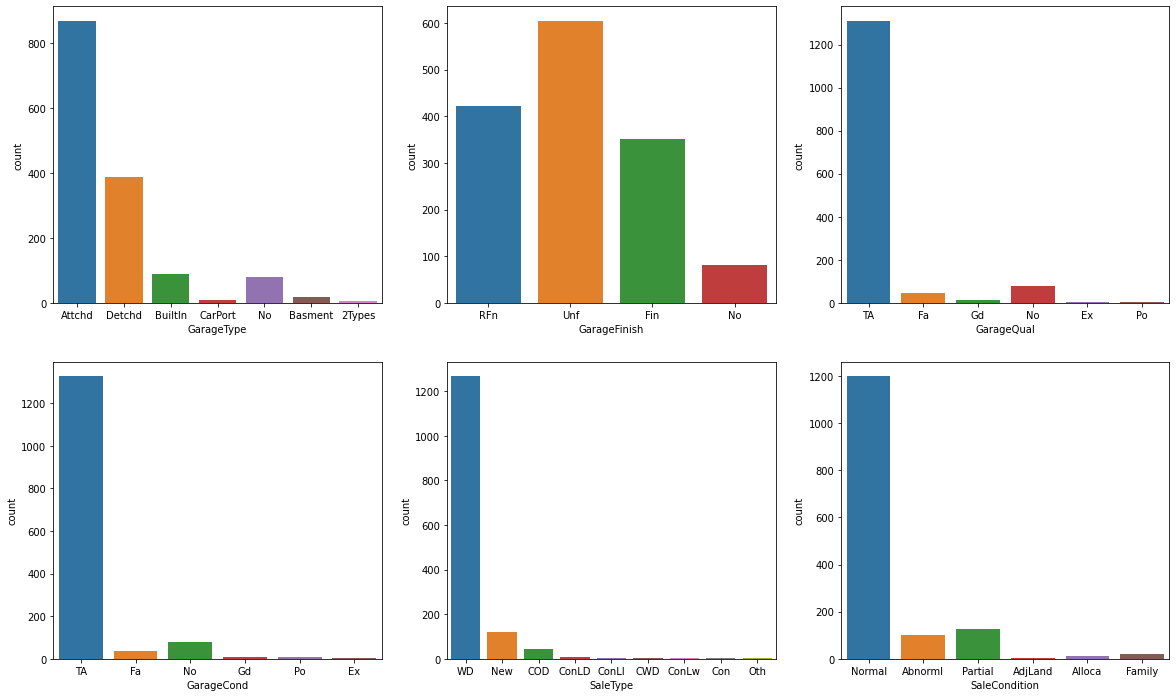

In [24]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageType',  data = df)
plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish', data = df)
plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = df)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageCond', data = df)
plt.subplot(2,3,5)
sns.countplot(x = 'SaleType',  data = df)
plt.subplot(2,3,6)
sns.countplot(x = 'SaleCondition', data = df)
plt.show()

In [25]:
df.drop(['GarageQual','GarageCond','SaleType'],axis=1,inplace=True)

In [26]:
df['GarageType'] = df['GarageType'].replace(['2Types','Basment','CarPort'],'Others')
df['SaleCondition'] = df['SaleCondition'].replace(['Alloca','AdjLand','Family'],'Others')


<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

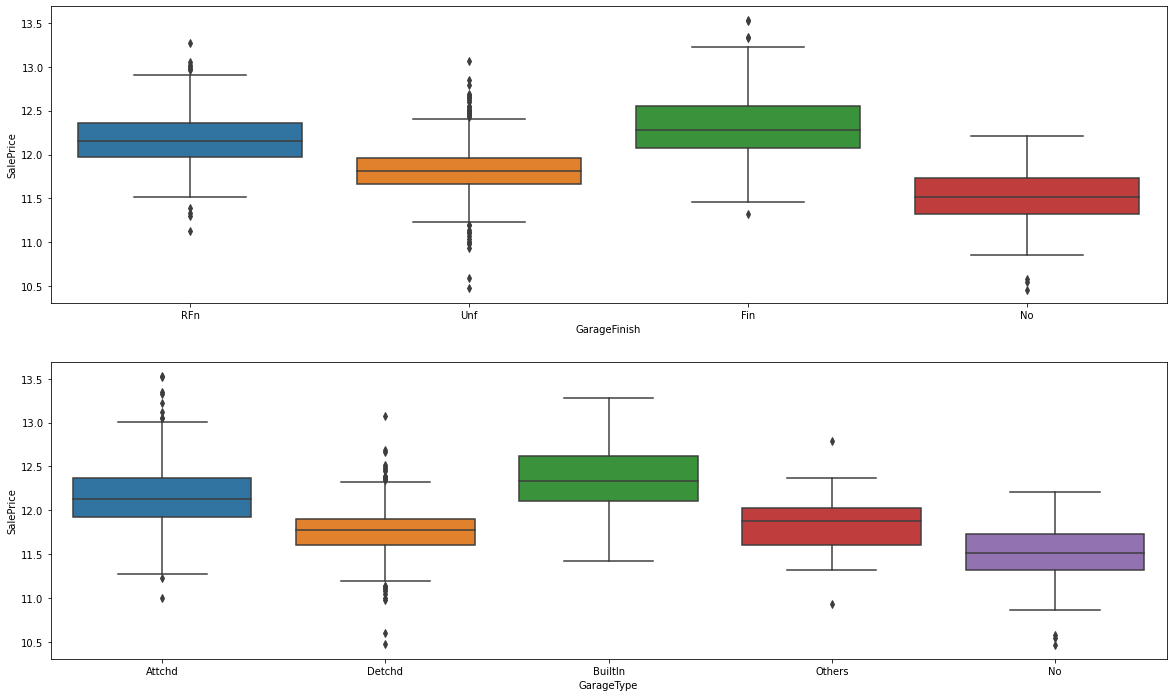

In [27]:
plt.figure(figsize=(20, 12))
plt.subplot(2,1,1)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = df)
plt.subplot(2,1,2)
sns.boxplot(x = 'GarageType', y ='SalePrice', data = df)


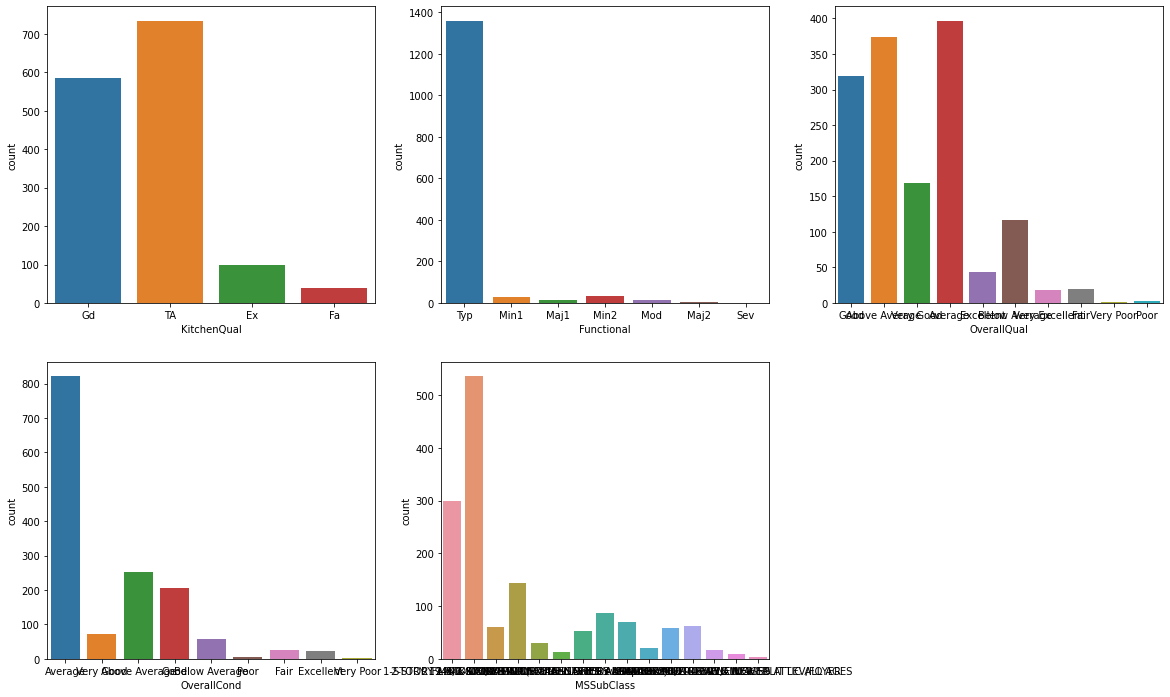

In [28]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'KitchenQual',  data = df)
plt.subplot(2,3,2)
sns.countplot(x = 'Functional', data = df)
plt.subplot(2,3,3)
sns.countplot(x = 'OverallQual', data = df)

plt.subplot(2,3,4)
sns.countplot(x = 'OverallCond', data = df)


plt.subplot(2,3,5)
sns.countplot(x = 'MSSubClass',  data = df)



plt.show()

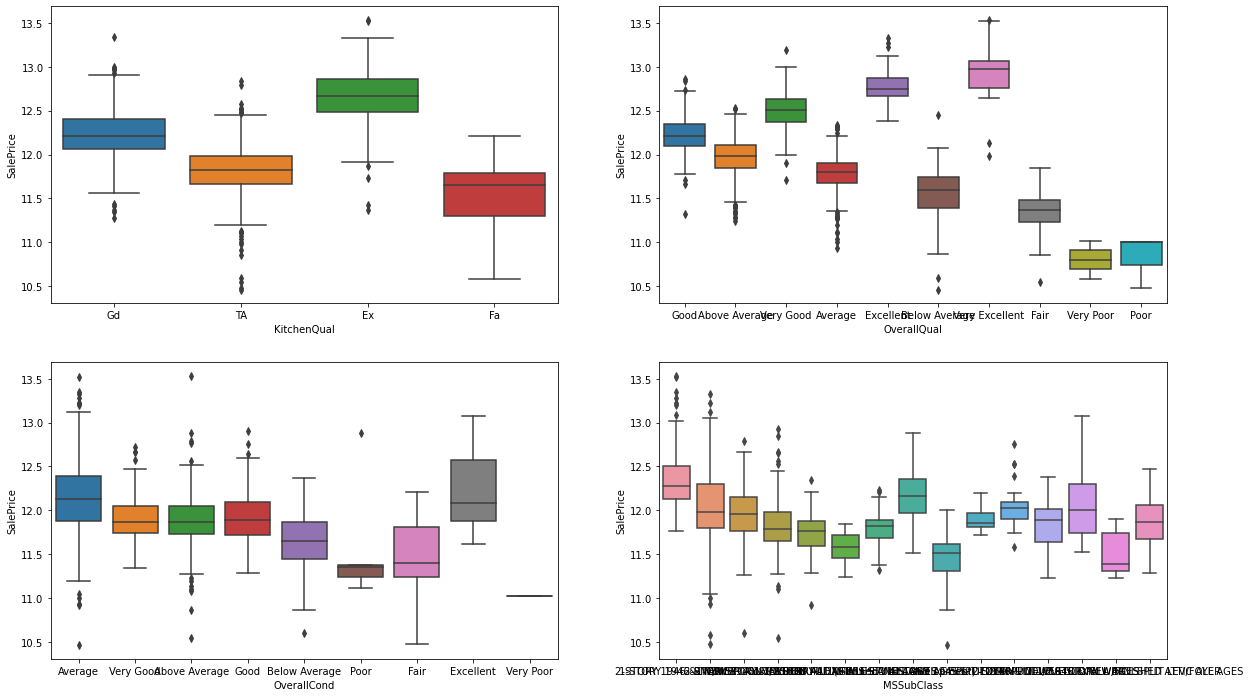

In [29]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x ='KitchenQual', y ='SalePrice', data = df)
plt.subplot(2,2,2)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = df)


plt.subplot(2,2,3)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = df)


plt.subplot(2,2,4)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = df)


plt.show()

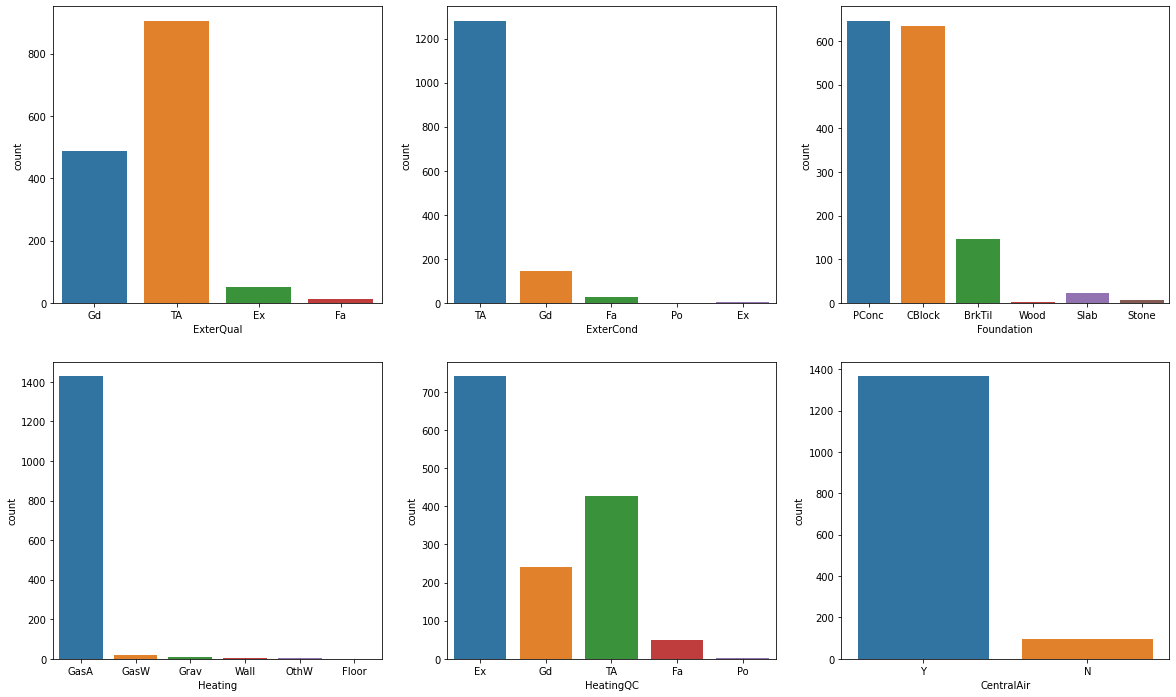

In [30]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'ExterQual',  data = df)
plt.subplot(2,3,2)
sns.countplot(x = 'ExterCond', data = df)
plt.subplot(2,3,3)
sns.countplot(x = 'Foundation', data = df)
plt.subplot(2,3,4)
sns.countplot(x = 'Heating', data = df)
plt.subplot(2,3,5)
sns.countplot(x = 'HeatingQC',  data = df)
plt.subplot(2,3,6)
sns.countplot(x = 'CentralAir', data = df)
plt.show()

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

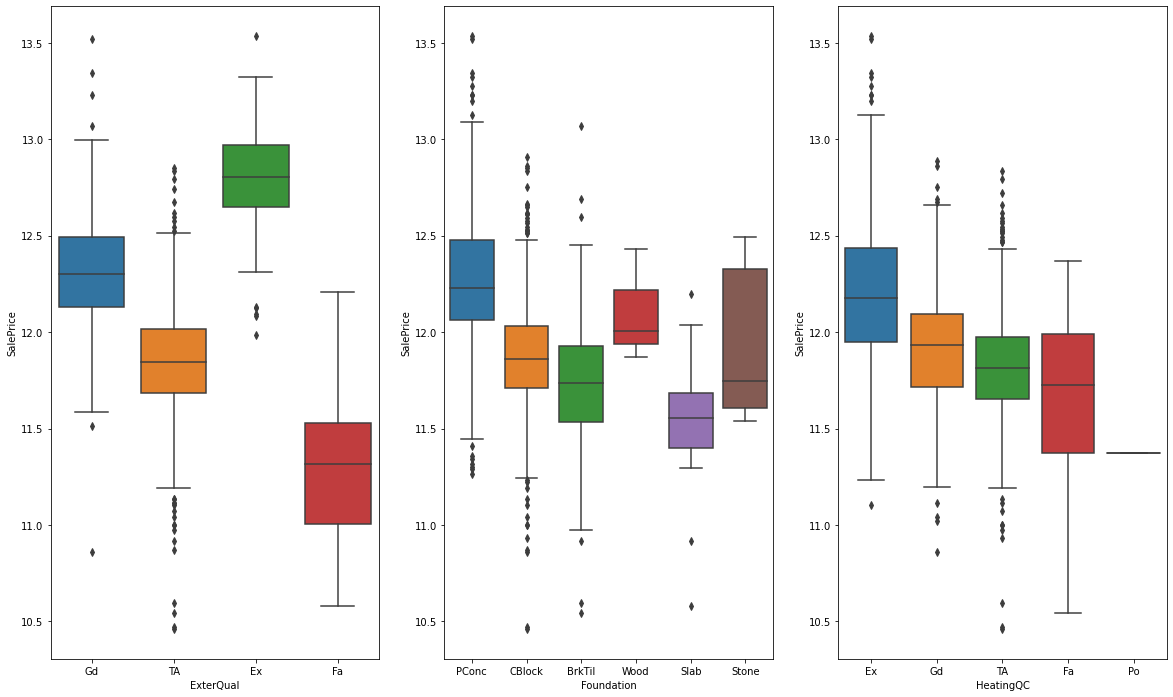

In [31]:
plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot( y ='SalePrice',x = 'ExterQual', data = df)
plt.subplot(1,3,2)
sns.boxplot(y = 'SalePrice',x = 'Foundation',  data = df)
plt.subplot(1,3,3)
sns.boxplot(y = 'SalePrice',x = 'HeatingQC',  data = df)

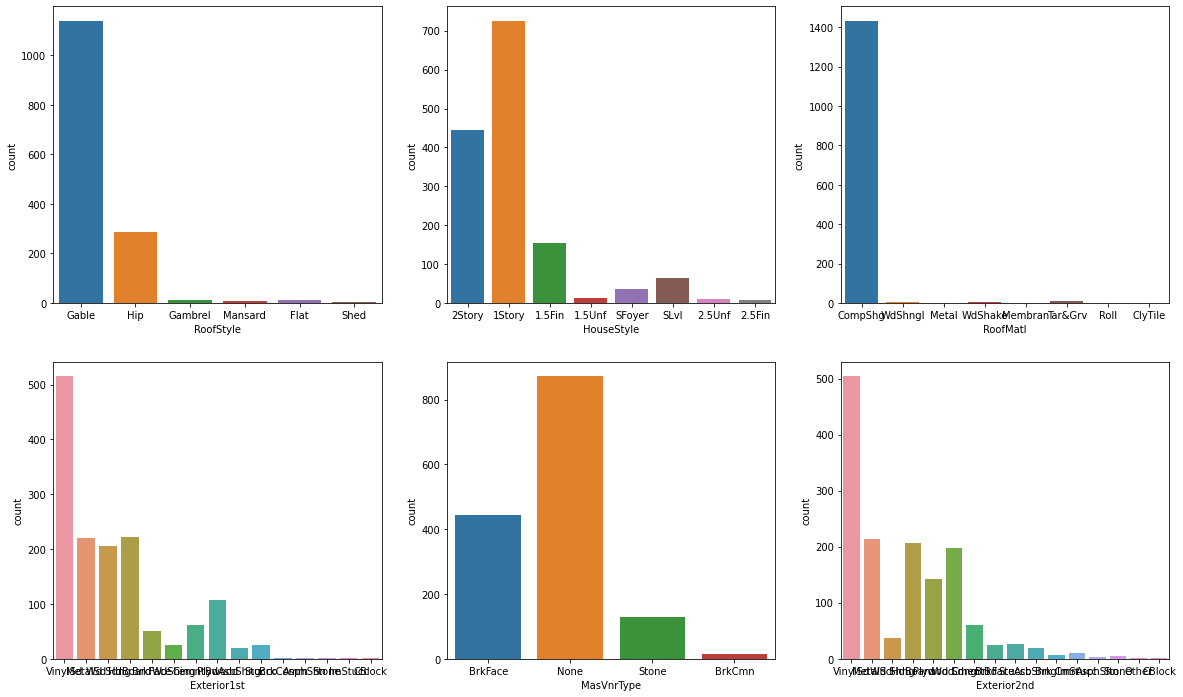

In [32]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'RoofStyle', data = df)
plt.subplot(2,3,2)
sns.countplot(x = 'HouseStyle',  data = df)
plt.subplot(2,3,3)
sns.countplot(x = 'RoofMatl', data = df)

plt.subplot(2,3,4)
sns.countplot(x = 'Exterior1st', data = df)

plt.subplot(2,3,5)
sns.countplot(x = 'MasVnrType', data = df)

plt.subplot(2,3,6)
sns.countplot(x = 'Exterior2nd',  data = df)


plt.show()

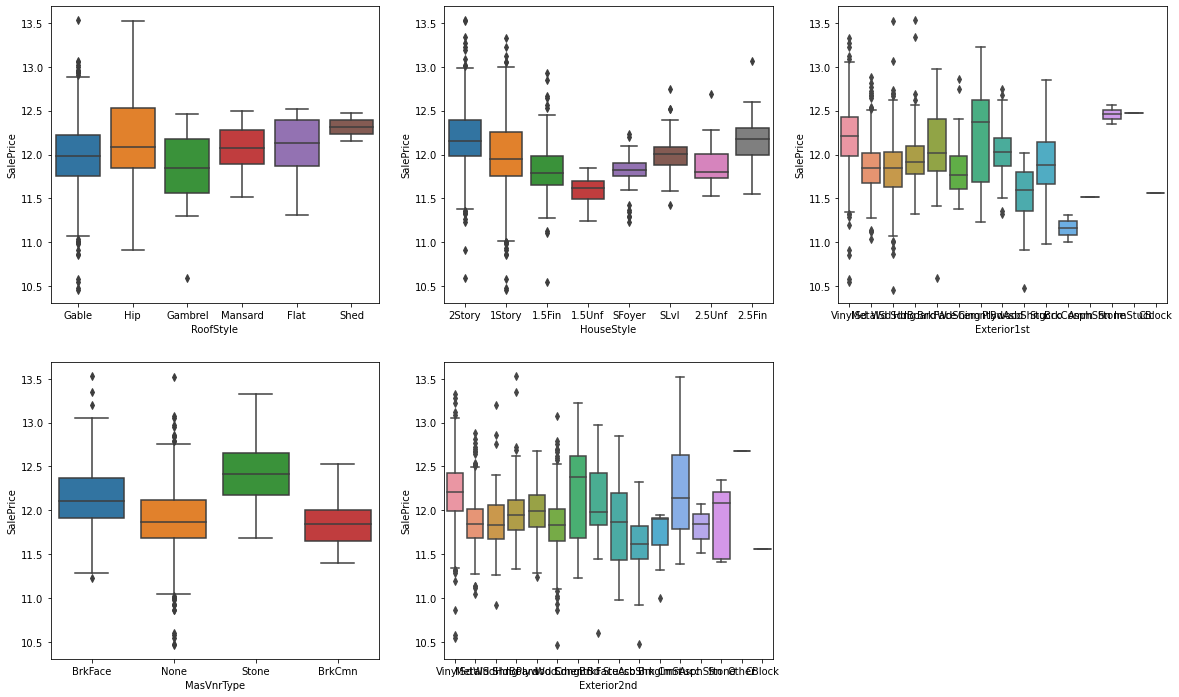

In [33]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = df)

plt.subplot(2,3,2)
sns.boxplot(x = 'HouseStyle', y ='SalePrice', data = df)

plt.subplot(2,3,3)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = df)

plt.subplot(2,3,4)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = df)

plt.subplot(2,3,5)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = df)

plt.show()

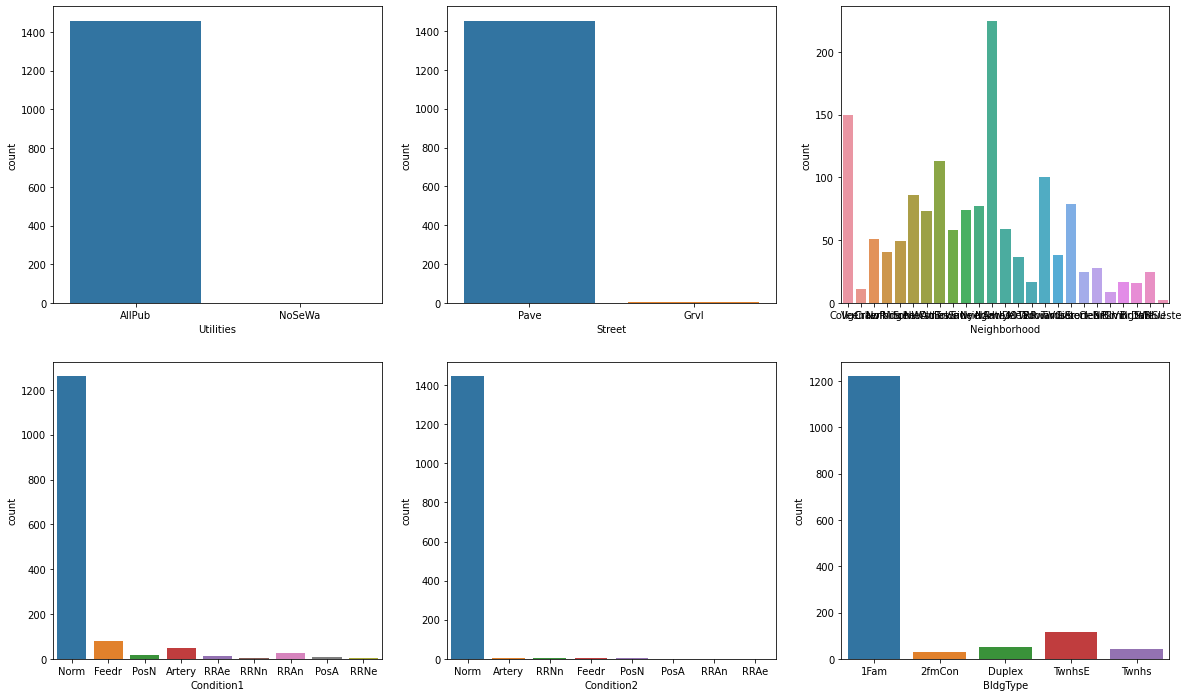

In [34]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.countplot(x = 'Utilities',  data = df)

plt.subplot(2,3,2)
sns.countplot(x = 'Street', data = df)

plt.subplot(2,3,3)
sns.countplot(x = 'Neighborhood', data = df)

plt.subplot(2,3,4)
sns.countplot(x = 'Condition1', data = df)

plt.subplot(2,3,5)
sns.countplot(x = 'Condition2',  data = df)

plt.subplot(2,3,6)
sns.countplot(x = 'BldgType', data = df)

plt.show()

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

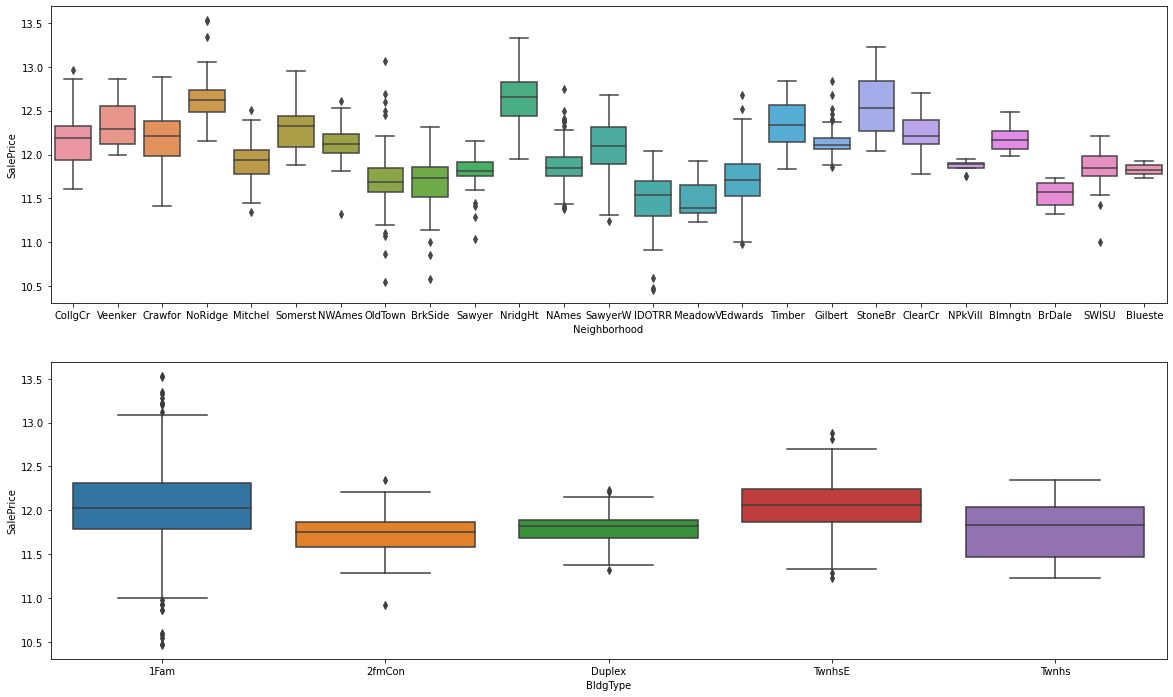

In [35]:
plt.figure(figsize=(20, 12))

plt.subplot(2,1,1)
sns.boxplot(x = 'Neighborhood', y ='SalePrice', data = df)


plt.subplot(2,1,2)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = df)

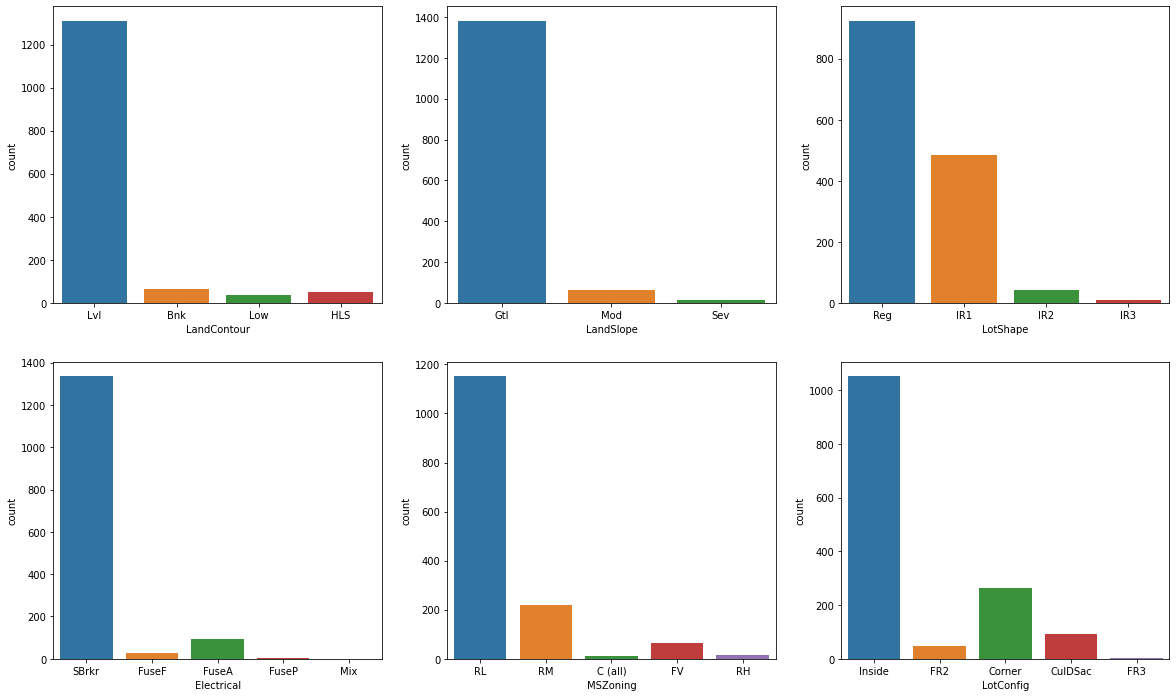

In [36]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.countplot(x = 'LandContour',  data = df)

plt.subplot(2,3,2)
sns.countplot(x = 'LandSlope', data = df)

plt.subplot(2,3,3)
sns.countplot(x = 'LotShape', data = df)

plt.subplot(2,3,4)
sns.countplot(x = 'Electrical', data = df)

plt.subplot(2,3,5)
sns.countplot(x = 'MSZoning',  data = df)

plt.subplot(2,3,6)
sns.countplot(x = 'LotConfig', data = df)

plt.show()

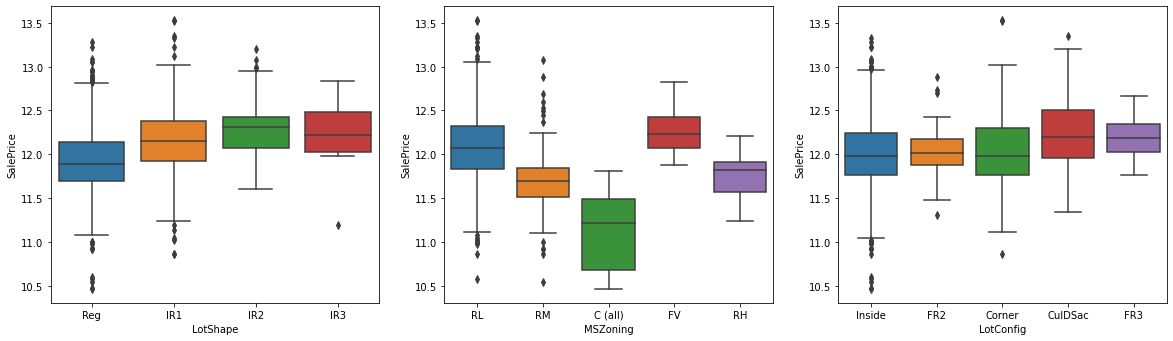

In [37]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'LotShape', y ='SalePrice', data = df)

plt.subplot(2,3,2)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = df)

plt.subplot(2,3,3)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = df)

plt.show()

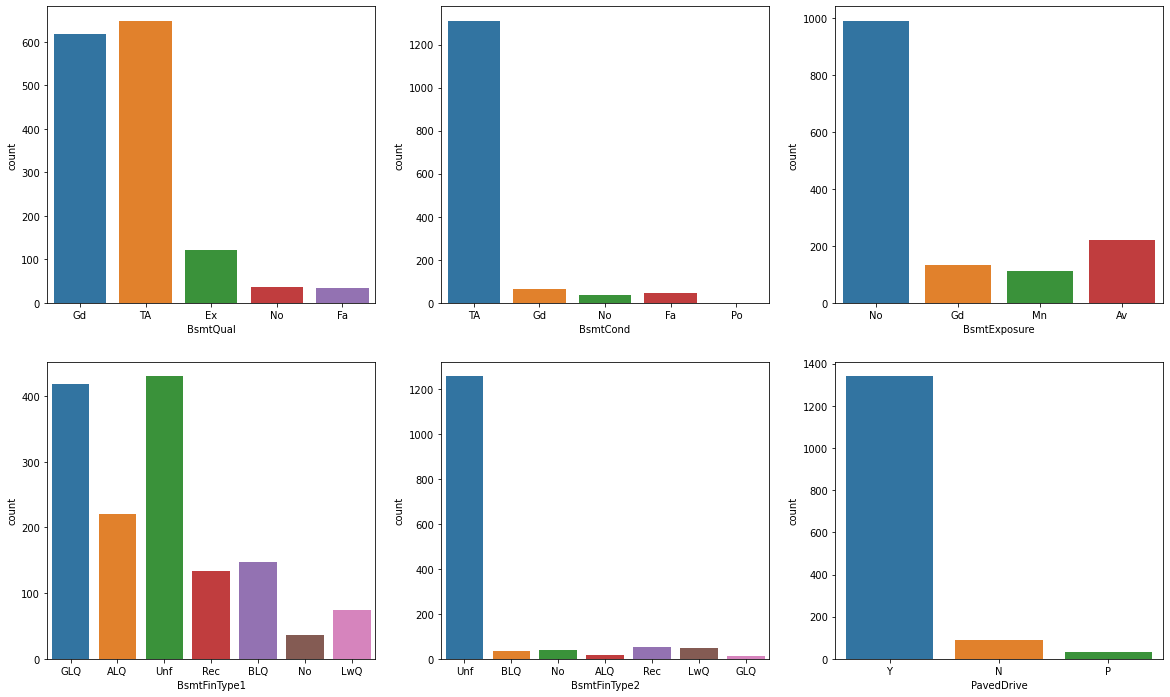

In [38]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.countplot(x = 'BsmtQual',  data = df)

plt.subplot(2,3,2)
sns.countplot(x = 'BsmtCond', data = df)

plt.subplot(2,3,3)
sns.countplot(x = 'BsmtExposure', data = df)

plt.subplot(2,3,4)
sns.countplot(x = 'BsmtFinType1', data = df)

plt.subplot(2,3,5)
sns.countplot(x = 'BsmtFinType2',  data = df)

plt.subplot(2,3,6)
sns.countplot(x = 'PavedDrive', data = df)

plt.show()

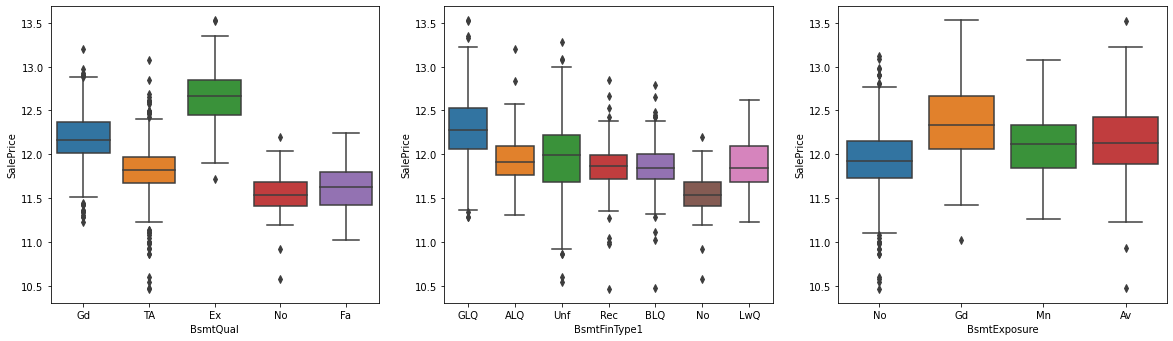

In [39]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'BsmtQual', y ='SalePrice', data = df)

plt.subplot(2,3,2)
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = df)

plt.subplot(2,3,3)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = df)

plt.show()

In [40]:
df.drop(['Functional','CentralAir','Heating','ExterCond','RoofMatl','Utilities','Street','Condition1','Condition2','LandSlope','LandContour','Electrical','BsmtFinType2','PavedDrive','BsmtCond'],axis=1,inplace=True)

In [41]:
df['Foundation'] = df['Foundation'].replace(['Slab','Wood','Stone'],'Others')
df['Exterior1st'] = df['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
df['Exterior2nd'] = df['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace'],'Others')
df['RoofStyle'] = df['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')
df['HouseStyle'] = df['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
df['MSZoning'] = df['MSZoning'].replace(['RH','C (all)'],'Others')



# Dropping highly skewed column 
# df.drop(['CentralAir','Heating','ExterCond'],axis=1,inplace=True)

In [42]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,61,0,0,0,0,0,2,2008,Normal,12.247694
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,0,0,5,2007,Normal,12.109011
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,42,0,0,0,0,0,9,2008,Normal,12.317167
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,35,272,0,0,0,0,2,2006,Abnorml,11.849398
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,84,0,0,0,0,0,12,2008,Normal,12.429216


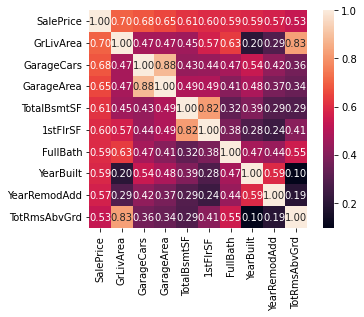

In [43]:
sns.heatmap(np.corrcoef(df[df.corr().nlargest(10, 'SalePrice')['SalePrice'].index].values.T), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=df.corr().nlargest(10, 'SalePrice')['SalePrice'].index.values, xticklabels=df.corr().nlargest(10, 'SalePrice')['SalePrice'].index.values)
plt.show()

In [44]:
df['RemodelYear'] = 2010 - ((df['YearRemodAdd'] - df['YearBuilt']) + df['YearBuilt']) 

In [45]:
cat_data = df.select_dtypes(include=['object']) 
cat_data.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleCondition'],
      dtype='object')

In [46]:
num_data = df.select_dtypes(include=['int64','float64']) 
num_data.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'RemodelYear'],
      dtype='object')

In [47]:
cat_data = pd.get_dummies(cat_data,drop_first=True)  

In [48]:
df.drop(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish',
       'SaleCondition','Id','OverallCond','MSSubClass','OverallQual'],axis=1,inplace=True)

In [49]:
df = pd.concat([df, cat_data], axis=1) 

In [50]:
df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True)

In [51]:
df.shape

(1460, 160)

In [52]:
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']


In [53]:
 X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size = 0.3, random_state=100)

In [54]:
scaler = StandardScaler()

X_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']] = scaler.fit_transform(X_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']])



In [55]:
# Ridge Model


params = {'alpha': [0.00015, 0.0005, 0.0015, 0.005, 0.003,0,20]}

ridge = Ridge()


folds = 5
cv_model= GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
cv_model.fit(X_train, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.00015, 0.0005, 0.0015, 0.005, 0.003, 0,
                                   20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [56]:
results_cv = pd.DataFrame(cv_model.cv_results_)
results_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009304,0.003014,0.002200,0.000399,0.00015,{'alpha': 0.00015},-1.013296e-01,-9.863201e-02,-0.105164,-8.983377e-02,...,-9.870381e-02,5.046444e-03,6,-0.079427,-0.070124,-0.074233,-0.080653,-0.079298,-0.076747,0.003978
1,0.006968,0.002797,0.002216,0.000388,0.0005,{'alpha': 0.0005},-1.013285e-01,-9.863063e-02,-0.105163,-8.983019e-02,...,-9.870072e-02,5.047491e-03,5,-0.079427,-0.070124,-0.074232,-0.080653,-0.079298,-0.076747,0.003978
2,0.015257,0.004032,0.003371,0.001339,0.0015,{'alpha': 0.0015},-1.013252e-01,-9.862671e-02,-0.105162,-8.982005e-02,...,-9.869192e-02,5.050459e-03,4,-0.079425,-0.070124,-0.074231,-0.080653,-0.079299,-0.076746,0.003978
3,0.015286,0.003657,0.003609,0.001331,0.005,{'alpha': 0.005},-1.013138e-01,-9.861318e-02,-0.105156,-8.978542e-02,...,-9.866154e-02,5.060620e-03,2,-0.079420,-0.070123,-0.074225,-0.080653,-0.079300,-0.076744,0.003979
4,0.009464,0.001224,0.002078,0.000501,0.003,{'alpha': 0.003},-1.013203e-01,-9.862087e-02,-0.105159,-8.980505e-02,...,-9.867882e-02,5.054856e-03,3,-0.079423,-0.070124,-0.074228,-0.080653,-0.079299,-0.076745,0.003979
5,0.051744,0.005320,0.002598,0.000483,0,{'alpha': 0},-7.465234e+09,-3.439064e+09,-0.107325,-1.603686e+10,...,-5.388231e+09,5.992870e+09,7,-0.079440,-0.070149,-0.075453,-0.081418,-0.079264,-0.077145,0.003995
6,0.007718,0.000760,0.002810,0.000756,20,{'alpha': 20},-9.206800e-02,-1.040724e-01,-0.101417,-8.668736e-02,...,-9.552630e-02,6.362409e-03,1,-0.085340,-0.077875,-0.080175,-0.086646,-0.086253,-0.083258,0.003557


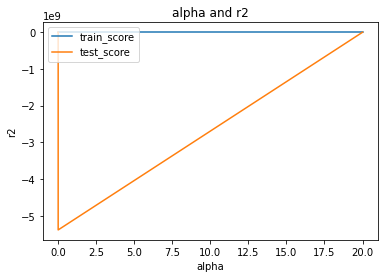

In [57]:
# plotting mean test and train scoes with alpha 
results_cv['param_alpha'] = results_cv['param_alpha'].astype('int32')

# plotting
plt.plot(results_cv['param_alpha'], results_cv['mean_train_score'])
plt.plot(results_cv['param_alpha'], results_cv['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("alpha and r2")
plt.legend(['train_score', 'test_score'], loc='upper left')
plt.show()

In [58]:
alpha = [20,10, 5, 2, 0.01, 0.03, 0.05]

In [59]:
for i in alpha:
    ridge = Ridge(alpha=i)
    ridge.fit(X_train, y_train)
    y_train_pred=ridge.predict(X_train)
    print(i,' train:', r2_score(y_train,y_train_pred))
    print('*'*20)
    ridge.fit(X_test, y_test)
    y_test_pred=ridge.predict(X_test)
    r2_score(y_test,y_test_pred)
    print(i,' test:', r2_score(y_test,y_test_pred))
    print('*'*20)
    

20  train: 0.9014966051084007
********************
20  test: 0.9078257658116909
********************
10  train: 0.9092831153213043
********************
10  test: 0.9211176675095595
********************
5  train: 0.9142499902254082
********************
5  test: 0.9307722193444876
********************
2  train: 0.9178873958063597
********************
2  test: 0.938360133554252
********************
0.01  train: 0.9204791310764023
********************
0.01  test: 0.9462269481975326
********************
0.03  train: 0.9204751674388999
********************
0.03  test: 0.9461544407534904
********************
0.05  train: 0.9204680079461178
********************
0.05  test: 0.946050513307293
********************


In [60]:
# parameters of ridge model

model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.72),
 ('LotFrontage', -0.469),
 ('LotArea', -0.402),
 ('MasVnrArea', -0.398),
 ('BsmtFinSF1', -0.375),
 ('BsmtFinSF2', -0.278),
 ('BsmtUnfSF', -0.274),
 ('TotalBsmtSF', -0.192),
 ('1stFlrSF', -0.19),
 ('2ndFlrSF', -0.189),
 ('LowQualFinSF', -0.174),
 ('GrLivArea', -0.169),
 ('BsmtFullBath', -0.167),
 ('BsmtHalfBath', -0.162),
 ('FullBath', -0.162),
 ('HalfBath', -0.162),
 ('BedroomAbvGr', -0.155),
 ('KitchenAbvGr', -0.143),
 ('TotRmsAbvGrd', -0.135),
 ('Fireplaces', -0.133),
 ('GarageCars', -0.125),
 ('GarageArea', -0.124),
 ('WoodDeckSF', -0.119),
 ('OpenPorchSF', -0.118),
 ('EnclosedPorch', -0.107),
 ('3SsnPorch', -0.098),
 ('ScreenPorch', -0.098),
 ('PoolArea', -0.093),
 ('MiscVal', -0.093),
 ('MoSold', -0.084),
 ('RemodelYear', -0.082),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.073),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.071),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.07),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0.07

Ridge model significant variables

- SaleCondition_Partial
- SaleCondition_Others
- SaleCondition_Normal
- GarageFinish_Unf
- GarageFinish_RFn




- Optimal Value of alpha for ridge : 10

In [61]:
lasso = Lasso()

# cross validation
cv_model1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

cv_model1.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.00015, 0.0005, 0.0015, 0.005, 0.003, 0,
                                   20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
cv_model1_results = pd.DataFrame(cv_model1.cv_results_)
cv_model1_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.100212,0.021670,0.003185,0.000676,0.00015,{'alpha': 0.00015},-0.098799,-0.098462,-0.102639,-0.085245,...,-0.095396,0.006151,2,-0.079128,-0.071066,-0.074116,-0.080609,-0.079656,-0.076915,0.003691
1,0.042128,0.014048,0.004486,0.001057,0.0005,{'alpha': 0.0005},-0.094213,-0.098372,-0.101390,-0.086356,...,-0.093538,0.005920,1,-0.080977,-0.074518,-0.076562,-0.082353,-0.082109,-0.079304,0.003175
2,0.027411,0.003545,0.005099,0.000964,0.0015,{'alpha': 0.0015},-0.092169,-0.102663,-0.103903,-0.092684,...,-0.096972,0.005184,3,-0.088394,-0.080711,-0.084998,-0.088403,-0.088699,-0.086241,0.003081
3,0.011176,0.002053,0.003736,0.000839,0.005,{'alpha': 0.005},-0.097650,-0.117150,-0.115005,-0.106381,...,-0.110247,0.007307,6,-0.106287,-0.099041,-0.101915,-0.104970,-0.106434,-0.103730,0.002852
4,0.016402,0.002907,0.006083,0.000899,0.003,{'alpha': 0.003},-0.094165,-0.110627,-0.108689,-0.100680,...,-0.104067,0.005973,5,-0.096858,-0.089451,-0.094035,-0.096794,-0.098247,-0.095077,0.003127


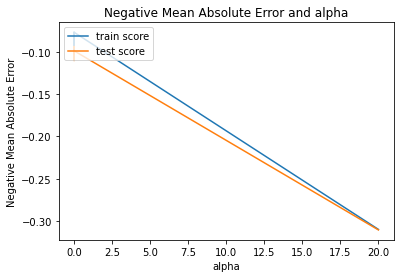

In [63]:
# plotting mean test and train scoes with alpha 
cv_model1_results['param_alpha'] = cv_model1_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_model1_results['param_alpha'], cv_model1_results['mean_train_score'])
plt.plot(cv_model1_results['param_alpha'], cv_model1_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [64]:
alpha = [0.001]

for i in alpha:
    lasso = Lasso(alpha=i)
    lasso.fit(X_train, y_train)
    y_train_pred=lasso.predict(X_train) 
    print(i,' train:', r2_score(y_train,y_train_pred))
    print('*'*20)
    lasso.fit(X_test, y_test)
    y_test_pred=lasso.predict(X_test)
    r2_score(y_test,y_test_pred)
    print(i,' test:', r2_score(y_test,y_test_pred))
    print('*'*20)
    

0.001  train: 0.8986279329457186
********************
0.001  test: 0.9243128977534549
********************


In [65]:
# parameters of lasso model

parameters_lasso_model = list(sorted(lasso.coef_))
parameters_lasso_model.insert(0, lasso.intercept_)
parameters_lasso_model = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list((zip(cols, parameters_lasso_model)))

[('constant', 11.72),
 ('LotFrontage', -0.469),
 ('LotArea', -0.402),
 ('MasVnrArea', -0.398),
 ('BsmtFinSF1', -0.375),
 ('BsmtFinSF2', -0.278),
 ('BsmtUnfSF', -0.274),
 ('TotalBsmtSF', -0.192),
 ('1stFlrSF', -0.19),
 ('2ndFlrSF', -0.189),
 ('LowQualFinSF', -0.174),
 ('GrLivArea', -0.169),
 ('BsmtFullBath', -0.167),
 ('BsmtHalfBath', -0.162),
 ('FullBath', -0.162),
 ('HalfBath', -0.162),
 ('BedroomAbvGr', -0.155),
 ('KitchenAbvGr', -0.143),
 ('TotRmsAbvGrd', -0.135),
 ('Fireplaces', -0.133),
 ('GarageCars', -0.125),
 ('GarageArea', -0.124),
 ('WoodDeckSF', -0.119),
 ('OpenPorchSF', -0.118),
 ('EnclosedPorch', -0.107),
 ('3SsnPorch', -0.098),
 ('ScreenPorch', -0.098),
 ('PoolArea', -0.093),
 ('MiscVal', -0.093),
 ('MoSold', -0.084),
 ('RemodelYear', -0.082),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.073),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.071),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.07),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0.07

 Lasso model significant variables

- SaleCondition_Partial
- SaleCondition_Others
- SaleCondition_Normal
- GarageFinish_Unf
- GarageFinish_RFn